# Stock Market Analysis

Import Libraries 

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as pt
from matplotlib.dates import date2num
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

C:\Users\kasir\AppData\Roaming\Python\Python311\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_apple = pd.read_csv("C:\\Users\\kasir\\Downloads\\Apple_Dataset.csv")

In [3]:
df_apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.128348,469033600
1,15/12/1980,0.122210,0.122210,0.121652,0.121652,0.121652,175884800
2,16/12/1980,0.113281,0.113281,0.112723,0.112723,0.112723,105728000
3,17/12/1980,0.115513,0.116071,0.115513,0.115513,0.115513,86441600
4,18/12/1980,0.118862,0.119420,0.118862,0.118862,0.118862,73449600


# EDA

Exploring the Dataset

* Check if there are any anomalies (null values, duplicates)
* Check number of columns and rows of the dataset.
* Understanding the data types
* Forming a hypotheses

In [4]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10973 entries, 0 to 10972
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10973 non-null  object 
 1   Open       10973 non-null  float64
 2   High       10973 non-null  float64
 3   Low        10973 non-null  float64
 4   Close      10973 non-null  float64
 5   Adj Close  10973 non-null  float64
 6   Volume     10973 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 600.2+ KB


In [5]:
df_apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df_apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df_apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10973.000000,10973.000000,10973.000000,10973.000000,10973.000000,1.097300e+04
mean,21.842280,22.078150,21.616875,21.856333,21.856333,3.186809e+08
std,45.046670,45.532776,44.597190,45.083587,45.083587,3.355976e+08
min,0.049665,0.049665,0.049107,0.049107,0.049107,0.000000e+00
25%,0.297991,0.303571,0.290179,0.297991,0.297991,1.136344e+08
50%,0.526786,0.535714,0.516607,0.526786,0.526786,2.061696e+08
75%,19.939285,20.157499,19.758215,19.928572,19.928572,3.990840e+08
max,217.589996,220.199997,213.000000,216.669998,216.669998,7.421641e+09


In [8]:
print('Null Values:')
print(df_apple.isnull().sum())

Null Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
print('Duplicate Values:', df_apple.duplicated().sum())

Duplicate Values: 0


# Data Cleaning

In [10]:
df_apple['Date'] = pd.to_datetime(df_apple['Date'], format='%d/%m/%Y')

In [11]:
df_apple.set_index('Date', inplace=True)

In [12]:
# Standardize data
# scaler = StandardScaler()

# df_apple[['Open', 'Close', 'High', 'Low', 'Volume']] = scaler.fit_transform(df_apple[['Open', 'Close', 'High', 'Low', 'Volume']])


# Data Visualisation

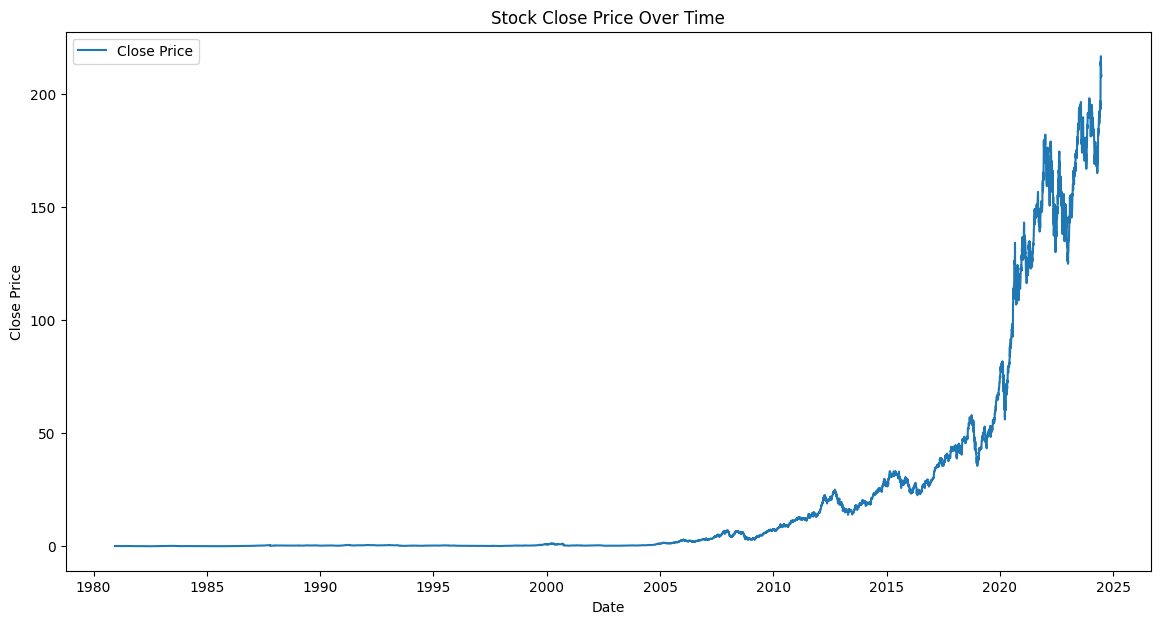

In [13]:
pt.figure(figsize=(14, 7))
pt.plot(df_apple['Close'], label='Close Price')
pt.title('Stock Close Price Over Time')
pt.xlabel('Date')
pt.ylabel('Close Price')
pt.legend()
pt.show()

* plot will show how Apple’s stock closing prices have changed over time

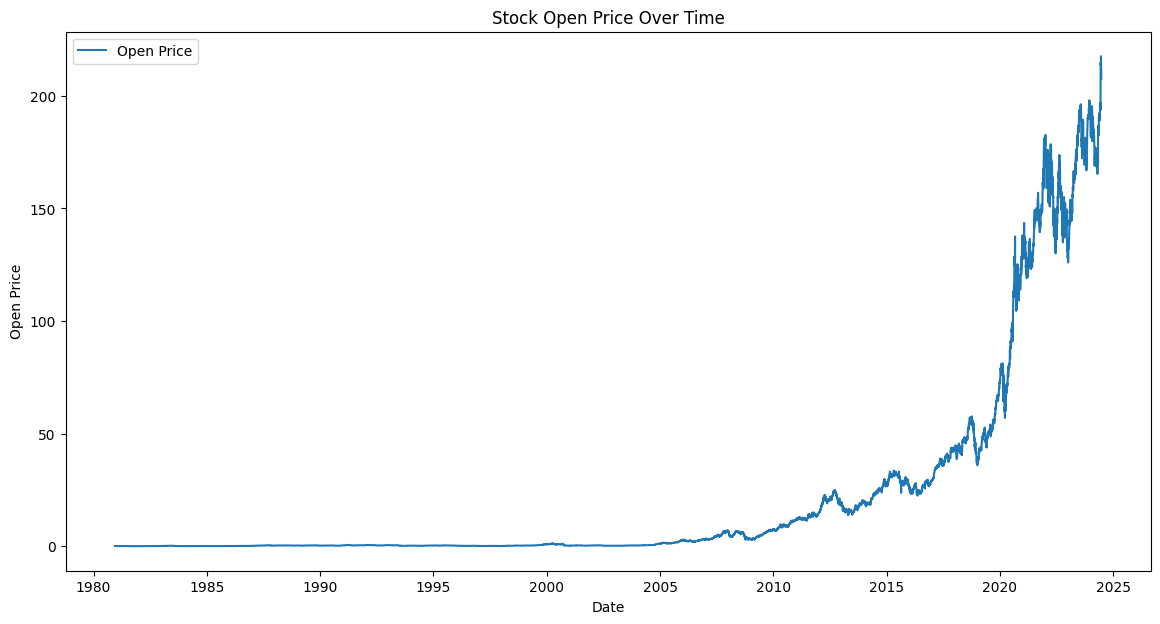

In [14]:
pt.figure(figsize=(14, 7))
pt.plot(df_apple['Open'], label='Open Price')
pt.title('Stock Open Price Over Time')
pt.xlabel('Date')
pt.ylabel('Open Price')
pt.legend()
pt.show()

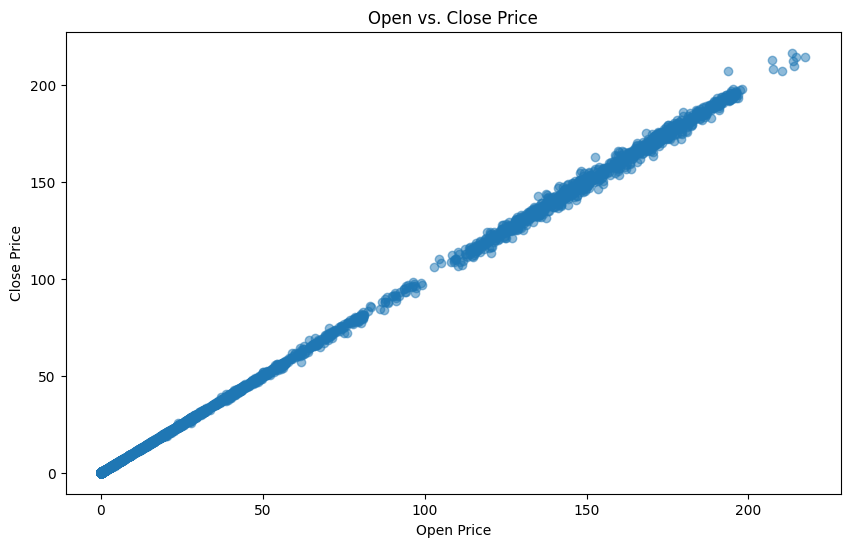

In [15]:
pt.figure(figsize=(10, 6))
pt.scatter(df_apple['Open'], df_apple['Close'], alpha=0.5)
pt.title('Open vs. Close Price')
pt.xlabel('Open Price')
pt.ylabel('Close Price')
pt.show()

* Strong Positive Correlation: The points form a very tight linear pattern, indicating a strong positive correlation between the Open and Close prices. When the opening price is higher, the closing price is also generally higher.
* Linearity: The linear relationship suggests that the opening price is a good predictor of the closing price. This is typical for stocks, where the closing price often does not deviate drastically from the opening price on the same day.
* Clustered Data Points: The points are densely packed along the line, confirming the high correlation

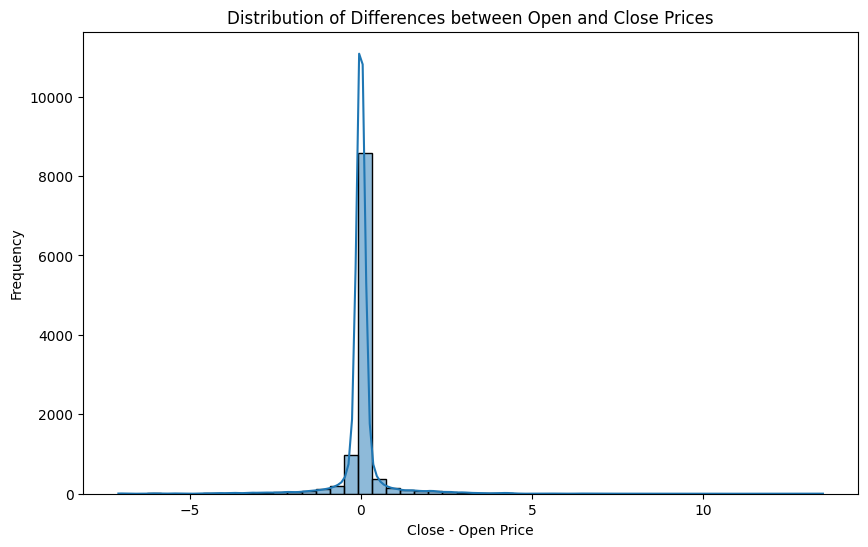

In [16]:
df_apple['Open_Close_Diff'] = df_apple['Close'] - df_apple['Open']

pt.figure(figsize=(10, 6))
sns.histplot(df_apple['Open_Close_Diff'], bins=50, kde=True)
pt.title('Distribution of Differences between Open and Close Prices')
pt.xlabel('Close - Open Price')
pt.ylabel('Frequency')
pt.show()

* Peak at 0: The most common difference between the Close and Open prices is around zero. This indicates that for a large number of trading days, the stock's opening and closing prices were very close to each other.
* Small Range: The differences mostly fall within a small range around zero, suggesting that the stock typically does not have large intraday price swings.
* Few Outliers: There are a few instances where the differences are more extreme, both positive and negative, indicating occasional days with significant price movements

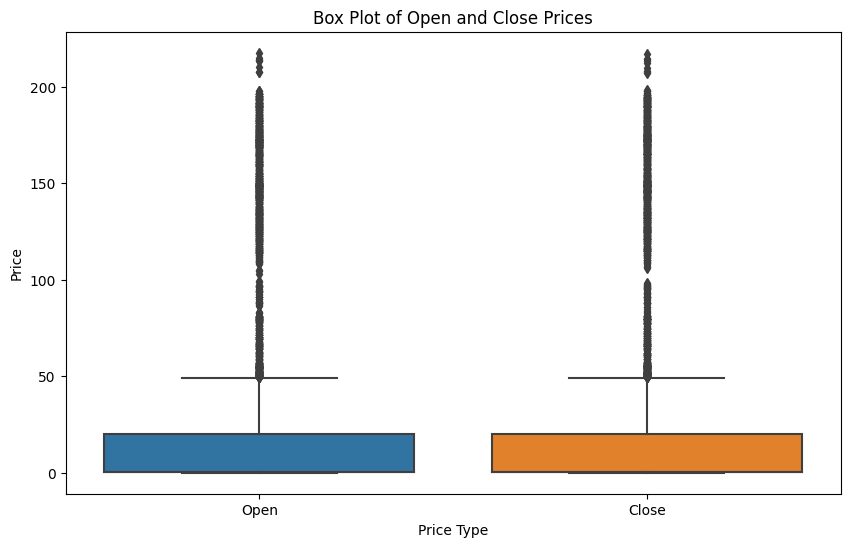

In [17]:
pt.figure(figsize=(10, 6))
sns.boxplot(data=df_apple[['Open', 'Close']])
pt.title('Box Plot of Open and Close Prices')
pt.xlabel('Price Type')
pt.ylabel('Price')
pt.show()

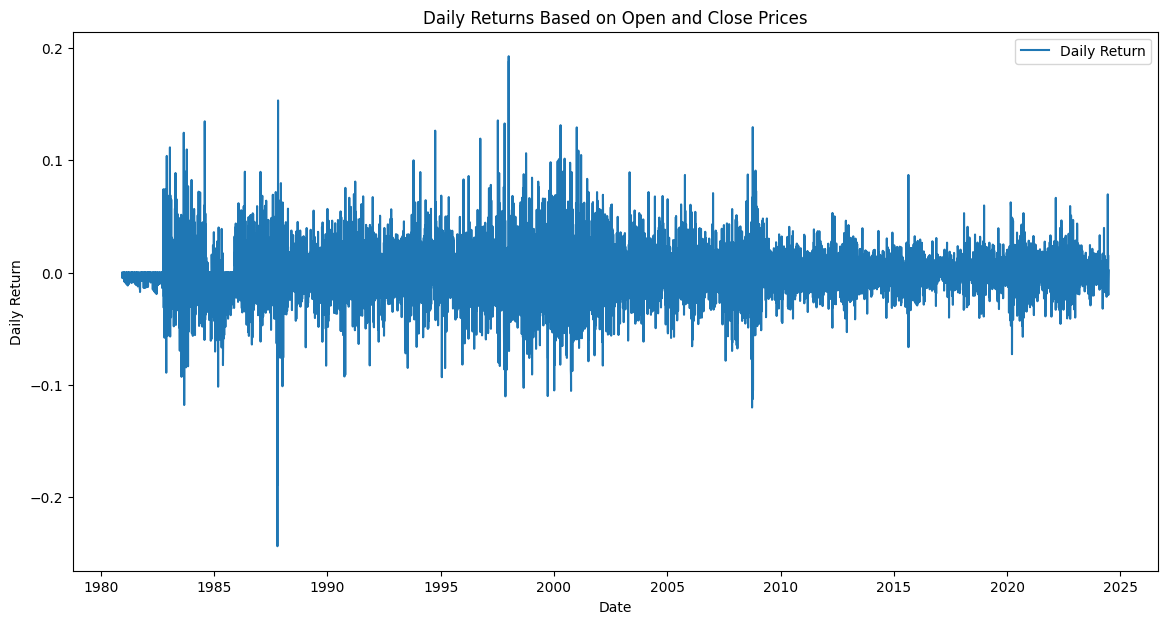

In [18]:
df_apple['Daily Return'] = (df_apple['Close'] - df_apple['Open']) / df_apple['Open']

pt.figure(figsize=(14, 7))
pt.plot(df_apple['Daily Return'], label='Daily Return')
pt.title('Daily Returns Based on Open and Close Prices')
pt.xlabel('Date')
pt.ylabel('Daily Return')
pt.legend()
pt.show()

* calculates the daily return as the percentage change from the opening price to the closing price and stores it in a new column called ‘Daily Return

Correlation between Open and Close prices: 0.9998725437849312


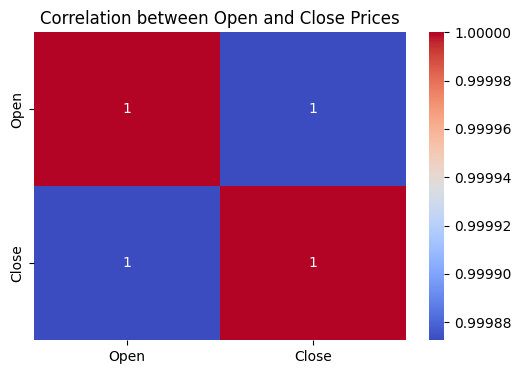

In [19]:
correlation = df_apple['Open'].corr(df_apple['Close'])
print(f'Correlation between Open and Close prices: {correlation}')

# Heatmap to visualize correlation
pt.figure(figsize=(6, 4))
sns.heatmap(df_apple[['Open', 'Close']].corr(), annot=True, cmap='coolwarm')
pt.title('Correlation between Open and Close Prices')
pt.show()

* Heatmap visually represents the correlation between the opening and closing prices of Apple’s stock, with the color intensity indicating the strength of the correlation

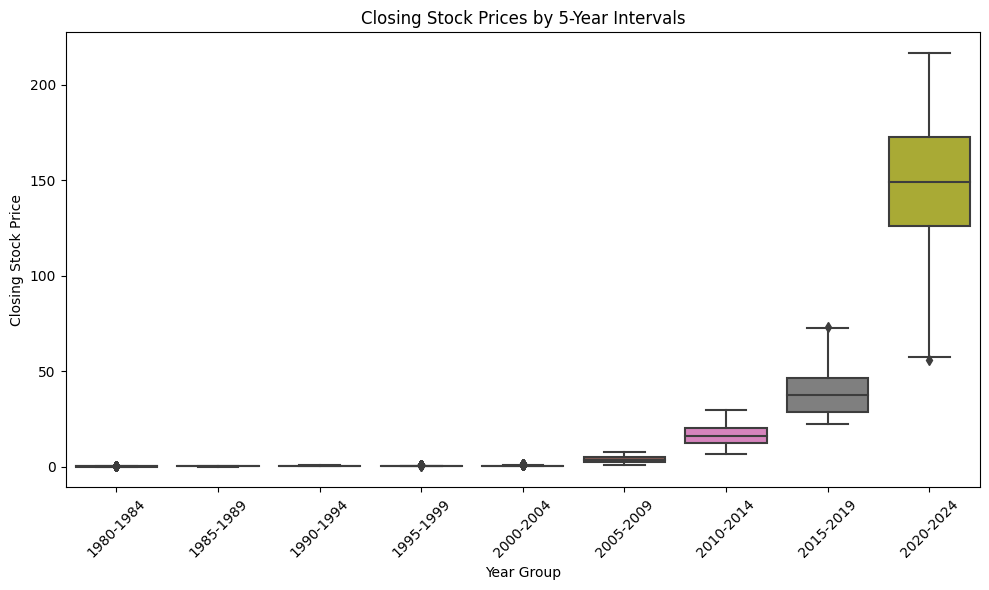

In [20]:
df_apple['Year'] = df_apple.index.year

# Create bins for every 5 years
bins = range(df_apple['Year'].min(), df_apple['Year'].max() + 6, 5)

# Assign each year to a bin
df_apple['Year Group'] = pd.cut(df_apple['Year'], bins=bins, right=False, labels=[f'{y}-{y+4}' for y in bins[:-1]])

# Plotting the boxplot
pt.figure(figsize=(10, 6))
sns.boxplot(x='Year Group', y='Close', data=df_apple)
pt.title('Closing Stock Prices by 5-Year Intervals')
pt.xlabel('Year Group')
pt.ylabel('Closing Stock Price')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

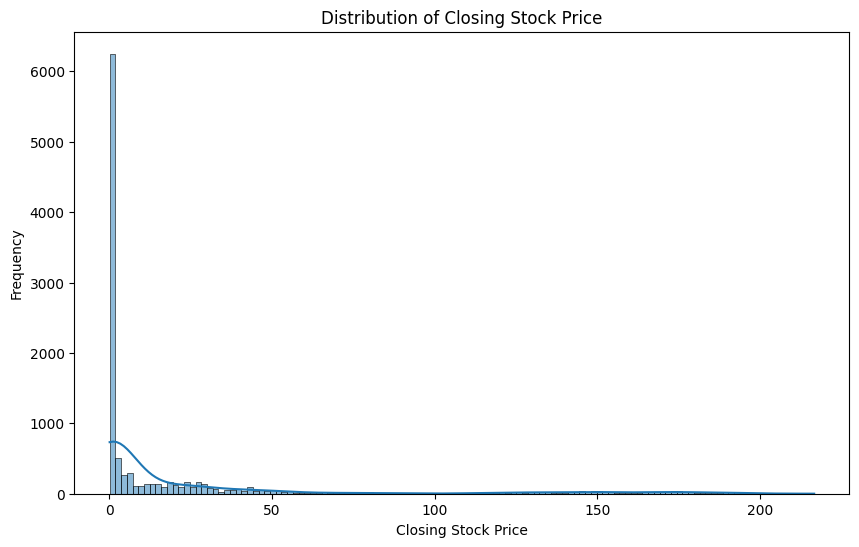

In [21]:
pt.figure(figsize=(10, 6))
sns.histplot(df_apple['Close'], kde=True)
pt.title('Distribution of Closing Stock Price')
pt.xlabel('Closing Stock Price')
pt.ylabel('Frequency')
pt.show()

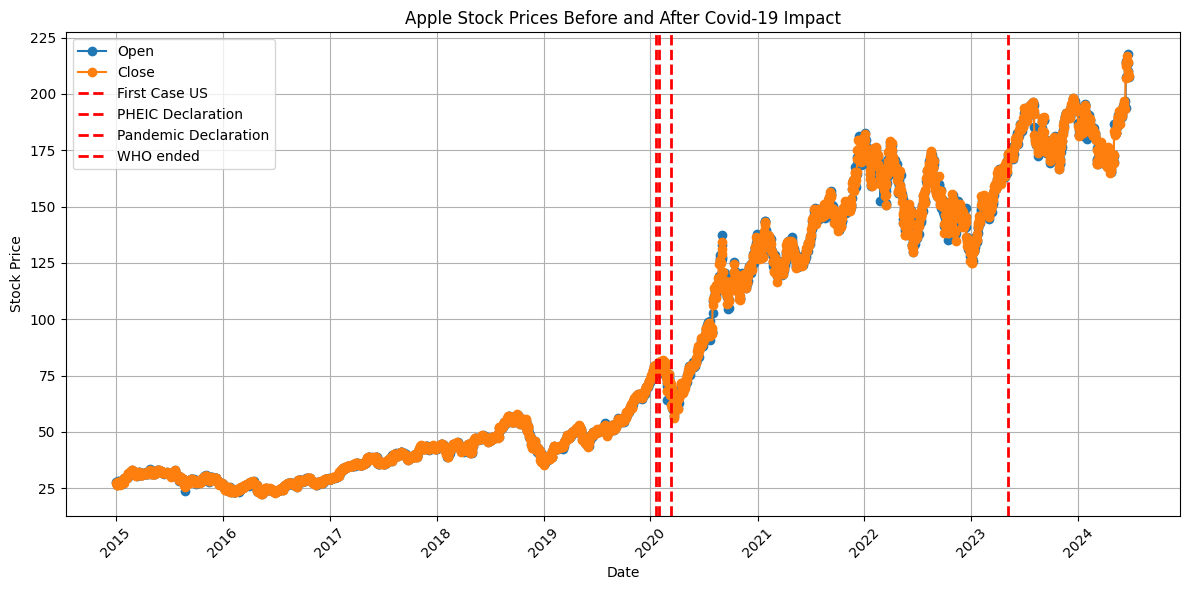

In [22]:
# Filter data for the entire available period of the dataset (from 2015 onwards)
df_covid = df_apple[df_apple.index.year >= 2015].copy()

# Define dates related to Covid-19 milestones
covid_dates = {
    'First Case US': '2020-01-21',
    'PHEIC Declaration': '2020-01-30',
    'Pandemic Declaration': '2020-03-11',
    'WHO ended': '2023-05-05'
}

# Convert dates to numerical values
covid_dates_numeric = {label: date2num(pd.to_datetime(date)) for label, date in covid_dates.items()}

# Plotting Open and Close prices after Covid-19 impact
pt.figure(figsize=(12, 6))
pt.plot(df_covid.index, df_covid['Open'], label='Open', marker='o')
pt.plot(df_covid.index, df_covid['Close'], label='Close', marker='o')

# Plot vertical lines for Covid-19 milestone dates
for label, num_date in covid_dates_numeric.items():
    pt.axvline(x=num_date, color='r', linestyle='--', linewidth=2, label=label)

pt.title('Apple Stock Prices Before and After Covid-19 Impact')
pt.xlabel('Date')
pt.ylabel('Stock Price')
pt.legend()
pt.grid(True)
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

It appears that there wasn't a significant drop in Apple's stock prices during the period around the first reported case in the US and the WHO's declaration of the COVID-19 pandemic. In fact, the stocks did dip slightly during these events, but overall, they continued to rise steadily, especially after the WHO declared the end of the PHEIC

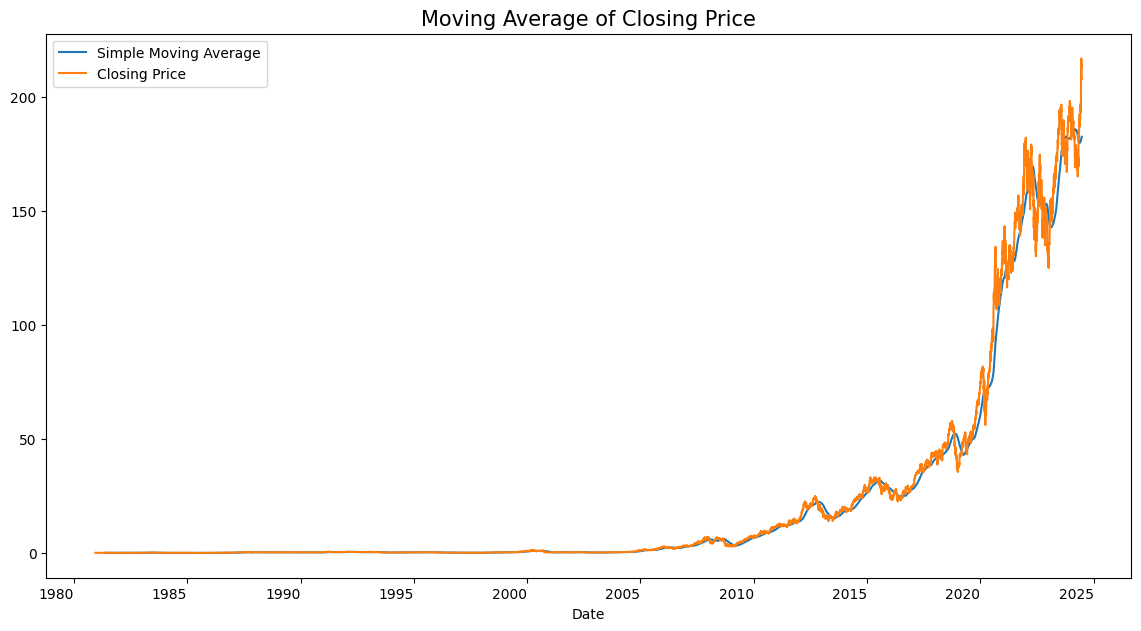

In [23]:
# Example visualization code
simple_ma = df_apple["Close"].rolling(window=100).mean()

pt.figure(figsize=(14,8))
simple_ma.plot(label="Simple Moving Average")
df_apple["Close"].plot(label="Closing Price")
pt.xticks(rotation=0)
pt.title("Moving Average of Closing Price", size=15)
pt.legend()
pt.show()

* Plot will show both the actual closing prices and the 100-day simple moving average, providing insight into the overall trend and smoothing out short-term fluctuations

# Train-Test Split

In [24]:
# Create lagged features
df_apple['Close_Lag1'] = df_apple['Close'].shift(1)  # Lagged by 1 day
df_apple['Close_Lag3'] = df_apple['Close'].shift(3)  # Lagged by 3 days
df_apple['Close_Lag5'] = df_apple['Close'].shift(5)  # Lagged by 5 days

# Create moving averages
df_apple['Close_MA7'] = df_apple['Close'].rolling(window=7).mean()  # 7-day moving average
df_apple['Close_MA30'] = df_apple['Close'].rolling(window=30).mean()  # 30-day moving average

delta = df_apple['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_apple['RSI'] = 100 - (100 / (1 + rs))

# Drop rows with NaN resulting from lagging and rolling operations
df_apple.dropna(inplace=True)

# Display the updated DataFrame with new features
df_apple.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close_Diff,Daily Return,Year,Year Group,Close_Lag1,Close_Lag3,Close_Lag5,Close_MA7,Close_MA30,RSI
Date,,,,,,,,,,,,,,,,
1981-01-26,0.144531,0.144531,0.143973,0.143973,0.143973,24640000,-0.000558,-0.003861,1981,1980-1984,0.146205,0.145089,0.146763,0.144212,0.139788,50.000000
1981-01-27,0.143973,0.143973,0.142857,0.142857,0.142857,23699200,-0.001116,-0.007751,1981,1980-1984,0.143973,0.146763,0.142299,0.144850,0.140272,56.000000
1981-01-28,0.138951,0.138951,0.138393,0.138393,0.138393,28156800,-0.000558,-0.004016,1981,1980-1984,0.142857,0.146205,0.145089,0.143654,0.140830,53.846154
1981-01-29,0.133929,0.133929,0.133371,0.133371,0.133371,43904000,-0.000558,-0.004166,1981,1980-1984,0.138393,0.143973,0.146763,0.142379,0.141518,39.189189
1981-01-30,0.127232,0.127232,0.126116,0.126116,0.126116,46188800,-0.001116,-0.008771,1981,1980-1984,0.133371,0.142857,0.146205,0.139668,0.141871,34.116928


In [25]:
split_date = '2020-01-21'  # Adjust this date based on your dataset

# Split the data into training and testing sets
train_data = df_apple[df_apple.index < split_date]
test_data = df_apple[df_apple.index >= split_date]

# Display the shapes of the training and testing datasets
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Training data shape: (9830, 16)
Testing data shape: (1114, 16)


In [26]:
# Create feature matrix X and target variable y for training and testing sets
X_train = train_data[['Close_Lag1', 'Close_Lag3', 'Close_Lag5', 'Close_MA7', 'Close_MA30', 'RSI']]
y_train = train_data['Close']

X_test = test_data[['Close_Lag1', 'Close_Lag3', 'Close_Lag5', 'Close_MA7', 'Close_MA30', 'RSI']]
y_test = test_data['Close']

# Model Builing:

# ARIMA

In [27]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

test_stationarity(df_apple['Close'])

ADF Statistic: 3.4171889432660163
p-value: 1.0
Critical Values: {'1%': -3.430949856942695, '5%': -2.861805103506478, '10%': -2.5669111094655066}


In [28]:
df_apple['Close_diff'] = df_apple['Close'] - df_apple['Close'].shift(1)

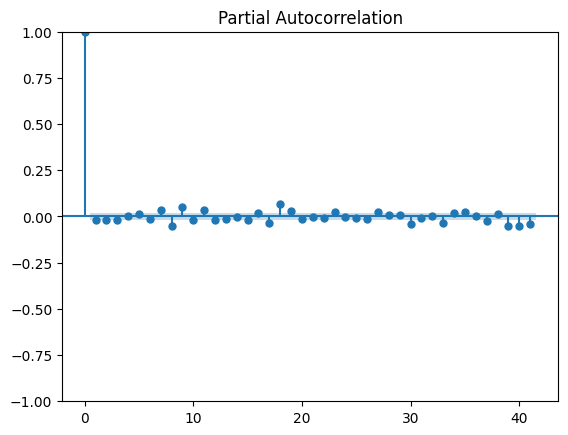

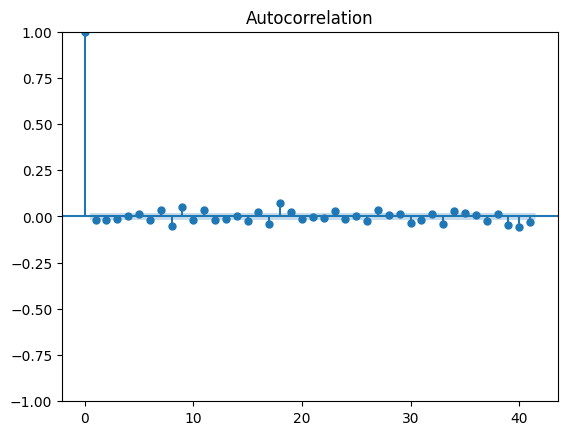

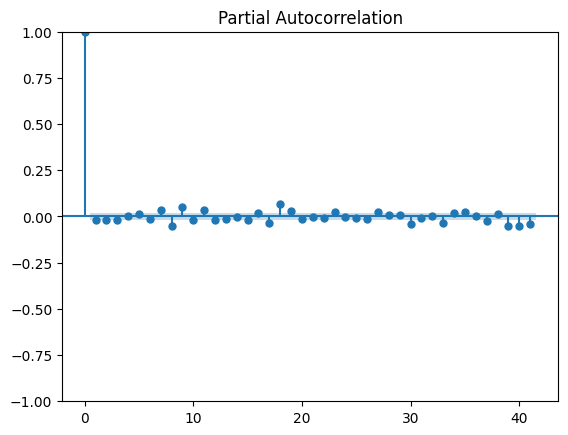

In [29]:
plot_acf(df_apple['Close_diff'].dropna())
plot_pacf(df_apple['Close_diff'].dropna())

In [30]:
# Define the ARIMA model with appropriate (p, d, q) parameters
model = ARIMA(df_apple['Close'], order=(5, 1, 0))  # Adjust p, d, q based on ACF/PACF plots

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                10944
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14225.364
Date:                Fri, 23 Aug 2024   AIC                          28462.729
Time:                        21:19:08   BIC                          28506.531
Sample:                             0   HQIC                         28477.489
                              - 10944                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0219      0.003     -7.971      0.000      -0.027      -0.017
ar.L2         -0.0193      0.003     -6.476      0.000      -0.025      -0.013
ar.L3         -0.0158      0.003     -4.929      0.0

In [31]:
# Forecasting next 20 days
forecast_steps = 20
forecast_values = model_fit.forecast(steps=forecast_steps)

# Get the last date in your original dataset
last_date = df_apple.index[-1]

# Generate date range for the forecasted period
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Print forecasted values with dates
print("Forecasted values for the next 20 days:")
for date, forecast in zip(forecast_dates, forecast_values):
    print(f"{date.date()}: {forecast:.2f}")

Forecasted values for the next 20 days:
2024-06-25: 208.29
2024-06-26: 208.26
2024-06-27: 208.17
2024-06-28: 208.14
2024-06-29: 208.16
2024-06-30: 208.16
2024-07-01: 208.16
2024-07-02: 208.16
2024-07-03: 208.16
2024-07-04: 208.16
2024-07-05: 208.16
2024-07-06: 208.16
2024-07-07: 208.16
2024-07-08: 208.16
2024-07-09: 208.16
2024-07-10: 208.16
2024-07-11: 208.16
2024-07-12: 208.16
2024-07-13: 208.16
2024-07-14: 208.16


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [32]:
# Assuming y_true are the actual values and forecast_values are the forecasted values
y_true = df_apple['Close'][-forecast_steps:]  # Actual values corresponding to forecast period

# Calculate metrics
mae = mean_absolute_error(y_true, forecast_values)
mse = mean_squared_error(y_true, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - forecast_values) / y_true)) * 100
forecast_bias = np.mean(y_true - forecast_values)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 10.03
Mean Squared Error (MSE): 140.05
Root Mean Squared Error (RMSE): 11.83


C:\Users\kasir\AppData\Local\Temp\ipykernel_16824\1624282273.py:8: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_true - forecast_values) / y_true)) * 100


# SARIMA model

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
model = SARIMAX(df_apple['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# Fit the model
model_fit = model.fit()
# Print the model summary
print(model_fit.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                10944
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -14247.099
Date:                            Fri, 23 Aug 2024   AIC                          28504.199
Time:                                    21:19:28   BIC                          28540.695
Sample:                                         0   HQIC                         28516.498
                                          - 10944                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5244      0.068      7.756      0.000       0.392       0.657
ma.L1         -0.5501      0.067   

In [34]:
# Forecasting next 20 days
forecast_steps = 20
forecast_values = model_fit.forecast(steps=forecast_steps)
last_date = df_apple.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
print("Forecasted values for the next 20 days:")
for date, forecast in zip(forecast_dates, forecast_values):
    print(f"{date.date()}: {forecast:.2f}")

Forecasted values for the next 20 days:
2024-06-25: 208.38
2024-06-26: 208.38
2024-06-27: 208.40
2024-06-28: 208.24
2024-06-29: 208.15
2024-06-30: 208.11
2024-07-01: 208.15
2024-07-02: 208.16
2024-07-03: 208.18
2024-07-04: 208.36
2024-07-05: 208.45
2024-07-06: 208.54
2024-07-07: 208.69
2024-07-08: 208.73
2024-07-09: 208.65
2024-07-10: 208.80
2024-07-11: 208.85
2024-07-12: 208.83
2024-07-13: 208.83
2024-07-14: 208.93


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [35]:
# Assuming y_true are the actual values and forecast_values are the forecasted values
y_true = df_apple['Close'][-forecast_steps:]  # Actual values corresponding to forecast period

# Calculate metrics
mae = mean_absolute_error(y_true, forecast_values)
mse = mean_squared_error(y_true, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - forecast_values) / y_true)) * 100
forecast_bias = np.mean(y_true - forecast_values)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 9.99
Mean Squared Error (MSE): 140.00
Root Mean Squared Error (RMSE): 11.83


C:\Users\kasir\AppData\Local\Temp\ipykernel_16824\1624282273.py:8: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_true - forecast_values) / y_true)) * 100


In [36]:
!pip install pystan==2.19.1.1
!pip install prophet


Defaulting to user installation because normal site-packages is not writeable
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\kasir\AppData\Local\Temp\pip-install-4yh3oc9g\pystan_2eaa24e3f2f045d9b4f383ba30deea42\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Defaulting to user installation because normal site-packages is not writeable


In [37]:
from prophet import Prophet

# Prepare the data
df_prophet = df_apple.reset_index()
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Define the Prophet model
model = Prophet()
model.fit(df_prophet)


21:20:11 - cmdstanpy - INFO - Chain [1] start processing
21:20:16 - cmdstanpy - INFO - Chain [1] done processing


# LSTM Model

In [38]:
!pip install keras
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [39]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_apple['Close'].values.reshape(-1, 1))

In [41]:
# Create the training data
train_data = scaled_data[:int(len(scaled_data) * 0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8):]

In [42]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\kasir\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Forecasting
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

8744/8744 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 4.0443e-05
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [44]:
# Print forecasted values
print("Forecasted values:")
for i, forecast in enumerate(predictions[:20]):
    print(f"Day {i+1}: {forecast[0]:.2f}")

Forecasted values:
Day 1: 28.19
Day 2: 28.33
Day 3: 28.40
Day 4: 28.60
Day 5: 28.84
Day 6: 29.05
Day 7: 29.27
Day 8: 29.50
Day 9: 29.70
Day 10: 29.82
Day 11: 29.88
Day 12: 29.94
Day 13: 29.88
Day 14: 29.72
Day 15: 29.54
Day 16: 29.27
Day 17: 29.05
Day 18: 28.83
Day 19: 28.77
Day 20: 28.81


In [45]:
# Assuming y_true are the actual values and forecast_values are the forecasted values
y_true = df_apple['Close'][-forecast_steps:]  # Actual values corresponding to forecast period

# Calculate metrics
mae = mean_absolute_error(y_true, forecast_values)
mse = mean_squared_error(y_true, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - forecast_values) / y_true)) * 100
forecast_bias = np.mean(y_true - forecast_values)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 9.99
Mean Squared Error (MSE): 140.00
Root Mean Squared Error (RMSE): 11.83


C:\Users\kasir\AppData\Local\Temp\ipykernel_16824\1624282273.py:8: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_true - forecast_values) / y_true)) * 100


In [46]:
train = df_apple['Close'][:-130]
test = df_apple['Close'][-130:]

##### Model Fitting using Auto Regressive Model

In [47]:
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [48]:
m1 = AutoReg(train, lags=5)  # lagged values are past values of the time series
# lags=5, you use the previous 5 months' sales data to predict the sales for the next month
model1 = m1.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [49]:
p1 = model1.predict(start=len(train), end=len(df_apple)-1)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [50]:
p1

10814    198.157436
10815    198.238262
10816    198.357942
10817    198.497792
10818    198.636071
            ...    
10939    215.837098
10940    215.985069
10941    216.133137
10942    216.281303
10943    216.429567
Length: 130, dtype: float64

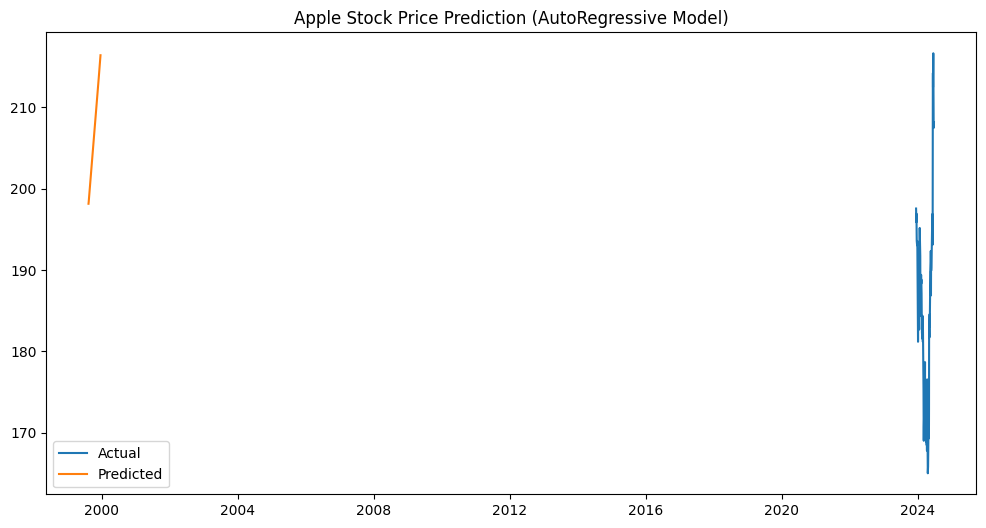

In [51]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(p1, label='Predicted')
plt.legend()
plt.title('Apple Stock Price Prediction (AutoRegressive Model)')
plt.show()

###### Model Evaluation

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_ar = mean_absolute_error(test, p1)
mse_ar = mean_squared_error(test, p1)
rmse_ar = sqrt(mse)
r2_ar = r2_score(test, p1)

# Print the results
print('MAE_AR:', mae_ar)
print('MSE_AR:', mse_ar)
print('RMSE_AR:', rmse_ar)
print('R-squared_AR:', r2_ar)

MAE_AR: 22.997906034580712
MSE_AR: 679.6007665117619
RMSE_AR: 11.832056705995765
R-squared_AR: -3.9312872885409336


In [53]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                10814
Model:                     AutoReg(5)   Log Likelihood              -13442.154
Method:               Conditional MLE   S.D. of innovations              0.839
Date:                Fri, 23 Aug 2024   AIC                          26898.308
Time:                        21:21:44   BIC                          26949.325
Sample:                             5   HQIC                         26915.511
                                10814                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.009      0.619      0.536      -0.012       0.023
Close.L1       0.9618      0.010     99.995      0.000       0.943       0.981
Close.L2       0.0119      0.013      0.891      0.373      -0.014       0.038
Close.L3       0.0113      0.013      0.844      0.399      -0.015       0.037
Close.L4       0.0090      0.013      0.677      0.499      -0.017       0.035
Close.L5       0.0067      0.010      0.699      0.485      -0.012       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9993           -0.0000j            0.9993           -0.0000
AR.2            1.7721           -2.6117j            3.1562           -0.1551
AR.3            1.7721           +2.6117j            3.1562            0.1551
AR.4           -2.9428           -2.5004j            3.8616           -0.3879
AR.5           -2.9428           +2.5004j            3.8616            0.3879
-----------------------------------------------------------------------------
"""

#### Exponential Smoothing

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

# Ensure your train data has a proper date index with frequency
train.index = pd.date_range(start=train.index[0], periods=len(train), freq='D')

# Build the model
m2 = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)

# Fit the model
model2 = m2.fit()

In [57]:
p2 = model_fit.predict(start=len(train), end=len(df_apple)-1)

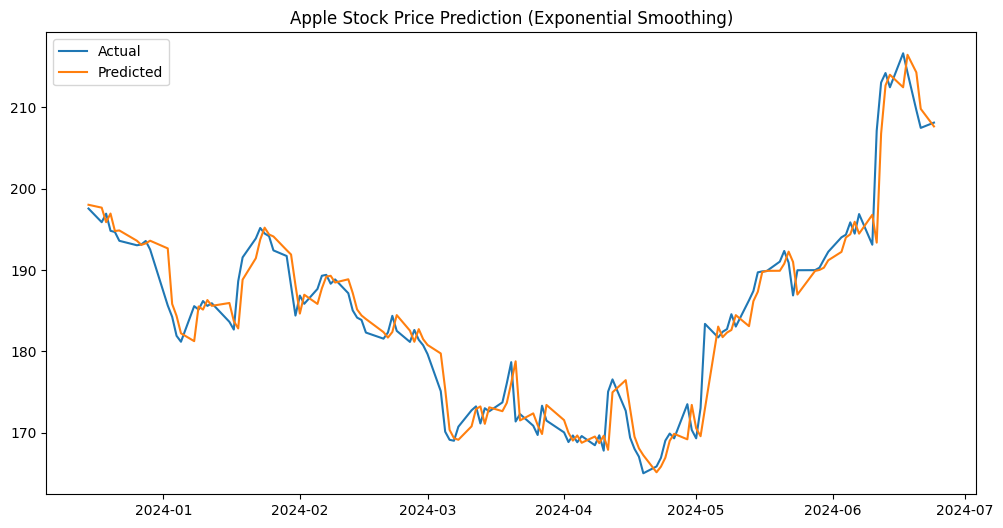

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(p2, label='Predicted')
plt.legend()
plt.title('Apple Stock Price Prediction (Exponential Smoothing)')
plt.show()

##### Model Evaluation

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Ensure predictions and test are aligned
if len(predictions) > len(test):
    predictions = predictions[:len(test)]
elif len(predictions) < len(test):
    test = test[:len(predictions)]

# Calculate the metrics
mae_es = mean_absolute_error(test, predictions)
mse_es = mean_squared_error(test, predictions)
rmse_es = sqrt(mse_es)
r2_es = r2_score(test, predictions)

# Print the metrics
print('MAE_ES:', mae_es)
print('MSE_ES:', mse_es)
print('RMSE_ES:', rmse_es)
print('R-squared_ES:', r2_es)


MAE_ES: 157.61738523780704
MSE_ES: 24955.747847183546
RMSE_ES: 157.97388343388772
R-squared_ES: -180.08273003650166


In [60]:
model2.summary()

Dep. Variable:,Close,No. Observations:,10814
Model:,ExponentialSmoothing,SSE,7618.268
Optimized:,True,AIC,-3766.064
Trend:,Additive,BIC,-3685.889
Seasonal:,Additive,AICC,-3766.030
Seasonal Periods:,7,Date:,"Fri, 23 Aug 2024"
Box-Cox:,False,Time:,21:22:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9611840,alpha,True
smoothing_trend,0.0007771,beta,True


In [75]:
import pickle

In [76]:
filename = 'trained_model2.sav'
pickle.dump(model_fit, open(filename, 'wb'))

In [77]:
loaded_model = pickle.load(open('trained_model2.sav', 'rb'))

In [78]:
# Assuming the input_data is the last known 'Close' price for forecasting
input_data = df_apple['Close'].iloc[-1]

# Forecasting the next 20 values (next 20 days' stock prices)
forecast = loaded_model.forecast(steps=20)

# Printing the forecasted values
print("Forecasted Stock Prices for the Next 20 Days:")
for i, price in enumerate(forecast, start=1):
    print(f"Day {i}: ${price:.2f}")

# Decision logic example based on the last predicted value
if forecast.iloc[-1] > input_data:
    print("The stock price is expected to increase after 20 days.")
else:
    print("The stock price is expected to decrease after 20 days.")

Forecasted Stock Prices for the Next 20 Days:
Day 1: $208.38
Day 2: $208.38
Day 3: $208.40
Day 4: $208.24
Day 5: $208.15
Day 6: $208.11
Day 7: $208.15
Day 8: $208.16
Day 9: $208.18
Day 10: $208.36
Day 11: $208.45
Day 12: $208.54
Day 13: $208.69
Day 14: $208.73
Day 15: $208.65
Day 16: $208.80
Day 17: $208.85
Day 18: $208.83
Day 19: $208.83
Day 20: $208.93
The stock price is expected to increase after 20 days.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
